<a href="https://colab.research.google.com/github/roncoejr/practice-plotting-dataframes/blob/main/practice_plotting_dataframes_11122022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('gasbillhistory.csv', header=None)

In [ ]:
df_electricity = pd.read_csv('arcadia-energy-history.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       77 non-null     object 
 1   1       77 non-null     float64
 2   2       77 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


In [5]:
df.rename(columns={0: 'transactionDate', 1: 'transactionAmount', 2: 'transactionStatus'}, inplace=True)

In [ ]:
df_electricity.rename(columns={'Date': 'transactionDate', 'Service Period': 'transactionServicePeriod', 'Due Date': 'paymentDueDate', 'kWh': 'periodkWh', 'Total': 'transactionAmount'}, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 2 to 76
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transactionDate    75 non-null     datetime64[ns]
 1   transactionAmount  75 non-null     float64       
 2   transactionStatus  75 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transactionDate           22 non-null     object 
 1   transactionServicePeriod  22 non-null     object 
 2   paymentDueDate            22 non-null     object 
 3   periodkWh                 22 non-null     float64
 4   transactionAmount         13 non-null     float64
dtypes: float64(2), object(3)
memory usage: 1008.0+ bytes


In [12]:
df

,transactionDate,transactionAmount,transactionStatus
0,transactionDate,0.00,transactionStatus
1,transactionDate,0.00,transactionStatus
2,2022-01-31,265.42,Received
3,2021-12-22,227.65,Received
4,2021-11-29,71.37,Received
...,...,...,...
72,2022-06-14,69.05,Received
73,2022-07-14,68.04,Received
74,2022-08-09,86.08,Received
75,2022-09-27,50.91,Received


In [16]:
df.drop([0, 1], inplace=True)

In [24]:
df

,transactionDate,transactionAmount,transactionStatus,transactionMonth,transactionYear
2,2022-01-31,265.42,Received,1,2022
3,2021-12-22,227.65,Received,12,2021
4,2021-11-29,71.37,Received,11,2021
5,2021-10-18,60.69,Received,10,2021
6,2021-09-21,44.32,Received,9,2021
...,...,...,...,...,...
72,2022-06-14,69.05,Received,6,2022
73,2022-07-14,68.04,Received,7,2022
74,2022-08-09,86.08,Received,8,2022
75,2022-09-27,50.91,Received,9,2022


In [18]:
# df['transactionDate'] = pd.to_datetime(df['transactionDate'][5:7] + df['transactionDate'][8:9] + df['transactionDate'][7:7] + df['transactionDate'][0:3])

df['transactionDate'] = pd.to_datetime(df['transactionDate'])

In [ ]:
df_electricity['transactionDate'] = pd.to_datetime(df['transactionDate'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 2 to 76
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transactionDate    75 non-null     datetime64[ns]
 1   transactionAmount  75 non-null     float64       
 2   transactionStatus  75 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.3+ KB


In [ ]:
df_electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   transactionDate           22 non-null     datetime64[ns]
 1   transactionServicePeriod  22 non-null     object        
 2   paymentDueDate            22 non-null     object        
 3   periodkWh                 22 non-null     float64       
 4   transactionAmount         13 non-null     float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 1008.0+ bytes


In [ ]:
df_electricity

,transactionDate,transactionServicePeriod,paymentDueDate,periodkWh,transactionAmount
0,2022-01-31,09/16/2022-10/17/2022,11/09/2022,1088.0,163.41
1,2021-12-22,08/16/2022-09/16/2022,10/10/2022,2120.0,9.55
2,2021-11-29,07/18/2022-08/16/2022,09/08/2022,2488.0,141.53
3,2021-10-18,06/16/2022-07/18/2022,08/10/2022,2355.0,234.62
4,2021-09-21,05/16/2022-06/16/2022,07/11/2022,1966.0,279.07
5,2021-06-28,04/15/2022-05/16/2022,06/08/2022,1010.0,126.81
6,2021-06-09,03/16/2022-04/15/2022,1055,0.0,NaN
7,2021-04-20,02/15/2022-03/16/2022,1046,0.0,NaN
8,2021-03-26,01/14/2022-02/15/2022,1225,0.0,NaN
9,2021-02-26,12/14/2021-01/14/2022,1080,0.0,NaN


In [23]:
filt_2019 = (df['transactionDate'].dt.year == 2019)

filt_2019

df_2019 = df[filt_2019]

df_2019['transactionYear'] = df_2019['transactionDate'].dt.year

df_2019['transactionMonth'] = df_2019['transactionDate'].dt.month

df_2019

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,transactionDate,transactionAmount,transactionStatus,transactionMonth,transactionYear
57,2019-12-28,305.93,Received,12,2019
58,2019-01-29,360.03,Received,1,2019
59,2019-02-28,494.29,Received,2,2019
60,2019-04-26,281.69,Received,4,2019
61,2019-05-28,113.55,Received,5,2019
62,2019-06-28,90.14,Received,6,2019
63,2019-07-29,68.27,Received,7,2019
64,2019-08-28,71.28,Received,8,2019
65,2019-09-30,72.50,Received,9,2019
66,2019-10-28,64.89,Received,10,2019


In [25]:
filt_2020 = (df['transactionDate'].dt.year == 2020)

filt_2020

df_2020 = df[filt_2020]

df_2020['transactionYear'] = df_2020['transactionDate'].dt.year

df_2020['transactionMonth'] = df_2020['transactionDate'].dt.month

df_2020

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,transactionDate,transactionAmount,transactionStatus,transactionMonth,transactionYear
13,2020-12-29,234.20,Received,12,2020
14,2020-11-30,169.00,Received,11,2020
15,2020-10-28,88.66,Received,10,2020
16,2020-09-28,63.18,Received,9,2020
17,2020-08-28,74.42,Received,8,2020
18,2020-07-29,72.43,Received,7,2020
19,2020-06-26,101.62,Received,6,2020
20,2020-05-28,164.23,Received,5,2020
21,2020-04-28,196.91,Received,4,2020
22,2020-03-27,320.91,Received,3,2020


In [ ]:
filt_electricity_2020 = (df_electricity['transactionDate'].dt.year == 2020)

filt_electricity_2020

df_electricity_2020 = df_electricity[filt_electricity_2020]

df_electricity_2020['transactionYear'] = df_electricity['transactionDate'].dt.year

df_electricity_2020['transactionMonth'] = df_electricity['transactionDate'].dt.month

df_electricity_2020

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,transactionDate,transactionServicePeriod,paymentDueDate,periodkWh,transactionAmount,transactionYear,transactionMonth
11,2020-12-29,10/14/2021-11/12/2021,981,0.0,NaN,2020,12
12,2020-11-30,09/16/2021-10/14/2021,11/08/2021,1176.0,90.63,2020,11
13,2020-10-28,08/17/2021-09/16/2021,1943,0.0,NaN,2020,10
14,2020-09-28,07/16/2021-08/17/2021,2255,0.0,NaN,2020,9
15,2020-08-28,06/16/2021-07/16/2021,08/09/2021,2100.0,41.73,2020,8
16,2020-07-29,05/17/2021-06/16/2021,07/09/2021,1613.0,50.87,2020,7
17,2020-06-26,04/15/2021-05/17/2021,06/09/2021,1120.0,12.42,2020,6
18,2020-05-28,03/16/2021-04/15/2021,1014,0.0,NaN,2020,5
19,2020-04-28,02/15/2021-03/16/2021,04/08/2021,1104.0,65.18,2020,4
20,2020-03-27,01/14/2021-02/15/2021,03/10/2021,1249.0,75.49,2020,3


In [ ]:
filt_electricity_2021 = (df_electricity['transactionDate'].dt.year == 2021)

filt_electricity_2021

df_electricity_2021 = df_electricity[filt_electricity_2021]

df_electricity_2021['transactionYear'] = df_electricity['transactionDate'].dt.year

df_electricity_2021['transactionMonth'] = df_electricity['transactionDate'].dt.month

df_electricity_2021

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,transactionDate,transactionServicePeriod,paymentDueDate,periodkWh,transactionAmount,transactionYear,transactionMonth
1,2021-12-22,08/16/2022-09/16/2022,10/10/2022,2120.0,9.55,2021,12
2,2021-11-29,07/18/2022-08/16/2022,09/08/2022,2488.0,141.53,2021,11
3,2021-10-18,06/16/2022-07/18/2022,08/10/2022,2355.0,234.62,2021,10
4,2021-09-21,05/16/2022-06/16/2022,07/11/2022,1966.0,279.07,2021,9
5,2021-06-28,04/15/2022-05/16/2022,06/08/2022,1010.0,126.81,2021,6
6,2021-06-09,03/16/2022-04/15/2022,1055,0.0,NaN,2021,6
7,2021-04-20,02/15/2022-03/16/2022,1046,0.0,NaN,2021,4
8,2021-03-26,01/14/2022-02/15/2022,1225,0.0,NaN,2021,3
9,2021-02-26,12/14/2021-01/14/2022,1080,0.0,NaN,2021,2
10,2021-01-29,11/12/2021-12/14/2021,1156,0.0,NaN,2021,1


In [ ]:
filt_electricity_2022 = (df_electricity['transactionDate'].dt.year == 2022)

filt_electricity_2022

df_electricity_2022 = df_electricity[filt_electricity_2022]

df_electricity_2022['transactionYear'] = df_electricity['transactionDate'].dt.year

df_electricity_2022['transactionMonth'] = df_electricity['transactionDate'].dt.month

df_electricity_2022

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,transactionDate,transactionServicePeriod,paymentDueDate,periodkWh,transactionAmount,transactionYear,transactionMonth
0,2022-01-31,09/16/2022-10/17/2022,11/09/2022,1088.0,163.41,2022,1


In [ ]:
fe_null = (df_electricity_2021['transactionAmount'].isna() == True)
fe_null

# df_electricity_2021.loc[fe_null, 'transactionAmount'] = 0

# df_electricity_2021[fe_null]['transactionAmount']

df_electricity_2021

,transactionDate,transactionServicePeriod,paymentDueDate,periodkWh,transactionAmount,transactionYear,transactionMonth
10,2021-01-29,11/12/2021-12/14/2021,1156,0.0,0.00,2021,1
9,2021-02-26,12/14/2021-01/14/2022,1080,0.0,0.00,2021,2
8,2021-03-26,01/14/2022-02/15/2022,1225,0.0,0.00,2021,3
7,2021-04-20,02/15/2022-03/16/2022,1046,0.0,0.00,2021,4
5,2021-06-28,04/15/2022-05/16/2022,06/08/2022,1010.0,126.81,2021,6
6,2021-06-09,03/16/2022-04/15/2022,1055,0.0,0.00,2021,6
4,2021-09-21,05/16/2022-06/16/2022,07/11/2022,1966.0,279.07,2021,9
3,2021-10-18,06/16/2022-07/18/2022,08/10/2022,2355.0,234.62,2021,10
2,2021-11-29,07/18/2022-08/16/2022,09/08/2022,2488.0,141.53,2021,11
1,2021-12-22,08/16/2022-09/16/2022,10/10/2022,2120.0,9.55,2021,12


In [ ]:
fe_null = (df_electricity_2020['transactionAmount'].isna() == True)
fe_null

df_electricity_2020.loc[fe_null, 'transactionAmount'] = 0

# df_electricity_2021[fe_null]['transactionAmount']

df_electricity_2020

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,transactionDate,transactionServicePeriod,paymentDueDate,periodkWh,transactionAmount,transactionYear,transactionMonth
11,2020-12-29,10/14/2021-11/12/2021,981,0.0,0.00,2020,12
12,2020-11-30,09/16/2021-10/14/2021,11/08/2021,1176.0,90.63,2020,11
13,2020-10-28,08/17/2021-09/16/2021,1943,0.0,0.00,2020,10
14,2020-09-28,07/16/2021-08/17/2021,2255,0.0,0.00,2020,9
15,2020-08-28,06/16/2021-07/16/2021,08/09/2021,2100.0,41.73,2020,8
16,2020-07-29,05/17/2021-06/16/2021,07/09/2021,1613.0,50.87,2020,7
17,2020-06-26,04/15/2021-05/17/2021,06/09/2021,1120.0,12.42,2020,6
18,2020-05-28,03/16/2021-04/15/2021,1014,0.0,0.00,2020,5
19,2020-04-28,02/15/2021-03/16/2021,04/08/2021,1104.0,65.18,2020,4
20,2020-03-27,01/14/2021-02/15/2021,03/10/2021,1249.0,75.49,2020,3


In [ ]:
fe_null = (df_electricity_2022['transactionAmount'].isna() == True)
fe_null

df_electricity_2022.loc[fe_null, 'transactionAmount'] = 0

# df_electricity_2022[fe_null]['transactionAmount']

df_electricity_2022

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,transactionDate,transactionServicePeriod,paymentDueDate,periodkWh,transactionAmount,transactionYear,transactionMonth
0,2022-01-31,09/16/2022-10/17/2022,11/09/2022,1088.0,163.41,2022,1


In [26]:
filt_2021 = (df['transactionDate'].dt.year == 2021)

filt_2021

df_2021 = df[filt_2021]

df_2021['transactionYear'] = df_2021['transactionDate'].dt.year

df_2021['transactionMonth'] = df_2021['transactionDate'].dt.month

df_2021

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,transactionDate,transactionAmount,transactionStatus,transactionMonth,transactionYear
3,2021-12-22,227.65,Received,12,2021
4,2021-11-29,71.37,Received,11,2021
5,2021-10-18,60.69,Received,10,2021
6,2021-09-21,44.32,Received,9,2021
7,2021-06-28,216.50,Received,6,2021
8,2021-06-09,126.71,Received,6,2021
9,2021-04-20,285.38,Received,4,2021
10,2021-03-26,390.25,Received,3,2021
11,2021-02-26,404.48,Received,2,2021
12,2021-01-29,436.64,Received,1,2021


In [27]:
filt_2022 = (df['transactionDate'].dt.year == 2022)

filt_2022

df_2022 = df[filt_2022]

df_2022['transactionYear'] = df_2022['transactionDate'].dt.year

df_2022['transactionMonth'] = df_2022['transactionDate'].dt.month

df_2022

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,transactionDate,transactionAmount,transactionStatus,transactionMonth,transactionYear
2,2022-01-31,265.42,Received,1,2022
68,2022-02-09,329.66,Received,2,2022
69,2022-03-09,246.83,Received,3,2022
70,2022-04-11,186.03,Received,4,2022
71,2022-05-10,100.33,Received,5,2022
72,2022-06-14,69.05,Received,6,2022
73,2022-07-14,68.04,Received,7,2022
74,2022-08-09,86.08,Received,8,2022
75,2022-09-27,50.91,Received,9,2022
76,2022-10-28,61.56,Received,10,2022


In [ ]:
filt_electricity_2022 = (df_electricity['transactionDate'].dt.year == 2022)

filt_electricity_2022

df_electricity_2022 = df_electricity[filt_electricity_2022]

df_electricity_2022['transactionYear'] = df_electricity['transactionDate'].dt.year

df_electricity_2022['transactionMonth'] = df_electricity['transactionDate'].dt.month

df_electricity_2022

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,transactionDate,transactionServicePeriod,paymentDueDate,periodkWh,transactionAmount,transactionYear,transactionMonth
0,2022-01-31,09/16/2022-10/17/2022,11/09/2022,1088.0,163.41,2022,1


In [ ]:
df_electricity_2021.sort_values(by='transactionMonth', inplace=True)
df_electricity_2022.sort_values(by='transactionMonth', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


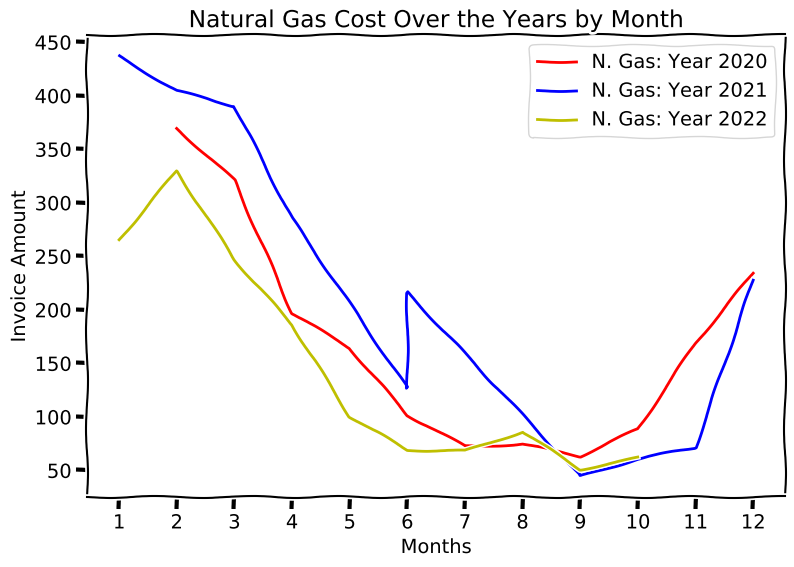

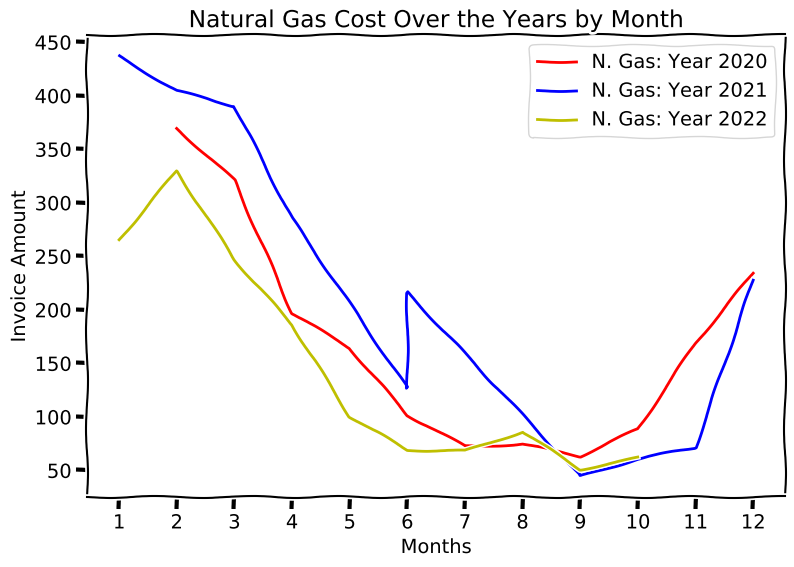

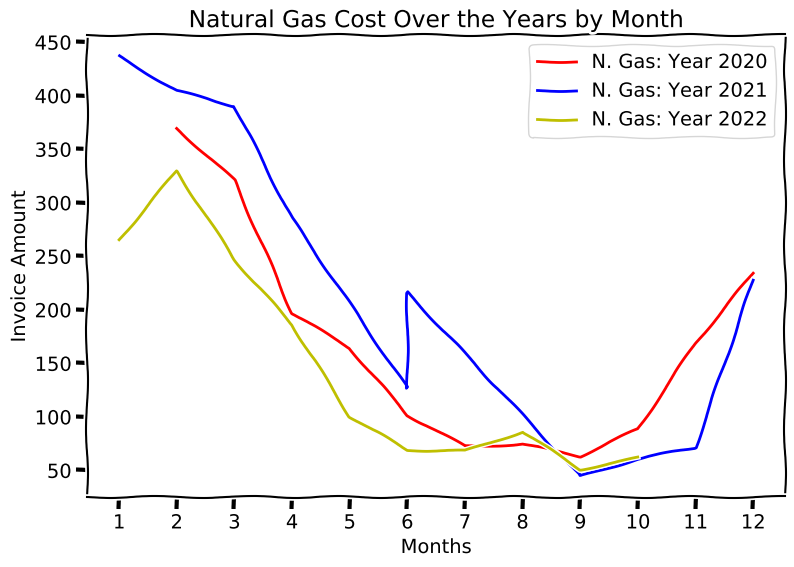

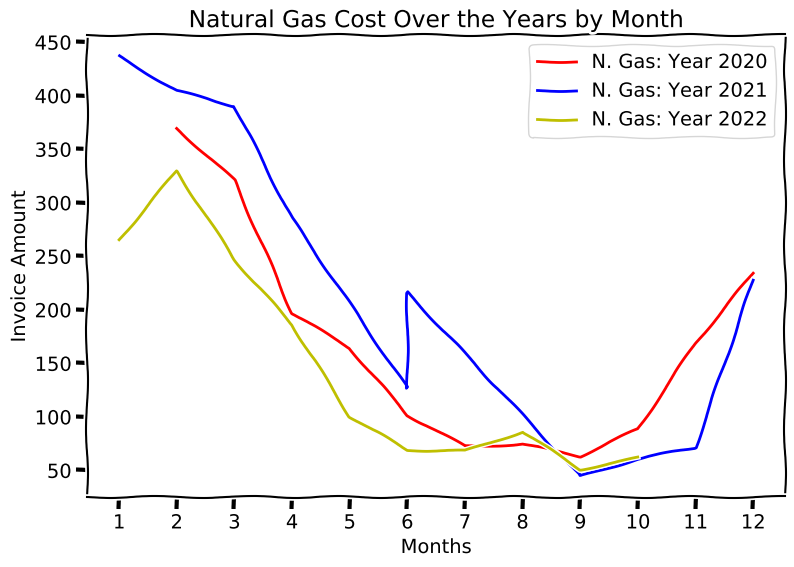

In [33]:
plt.xkcd(True)
f = plt.figure()
f.set_figwidth(9)
f.set_figheight(6)
# plt.plot(df_2019['transactionMonth'], df_2019['transactionAmount'], 'g-', label='N. Gas: Year 2019')
plt.plot(df_2020['transactionMonth'], df_2020['transactionAmount'], 'r-', label='N. Gas: Year 2020')
# plt.plot(df_electricity_2020['transactionMonth'], df_electricity_2020['transactionAmount'], '^-', label='Electricity: Year 2020')
plt.plot(df_2021['transactionMonth'], df_2021['transactionAmount'], 'b-', label='N. Gas: Year 2021')
# plt.plot(df_electricity_2021['transactionMonth'], df_electricity_2021['transactionAmount'], 'm^-', label='Electricity: Year 2021')
plt.plot(df_2022['transactionMonth'], df_2022['transactionAmount'], 'y-', label='N. Gas: Year 2022')
# plt.plot(df_electricity_2022['transactionMonth'], df_electricity_2022['transactionAmount'], 'c^-', label='Electricity: Year 2022')
# plt.plot(df.index, df['transactionAmount'], '-')
# plt_image = plt.plot(df_2022['transactionMonth'], df_2022['transactionAmount'], 'y-', label='Year 2022').get_figure()

y = {'Year 2020': df_2020['transactionAmount'], 'Year 2021': df_2021['transactionAmount'], 'Year 2022': df_2022['transactionAmount']}
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
# plt.plot(y, x)
plt.title("Natural Gas Cost Over the Years by Month")
plt.xlabel("Months")
plt.ylabel("Invoice Amount")
plt.xticks(np.arange(min(x), max(x)+1, 1))

plt.legend()


images_dir = '/'
time_now = datetime.now()

time_ident = time_now.strftime("%H%M%S")
plt.savefig(f"{images_dir}/gas_bill_over_the_years-{time_ident}.png", dpi = 1600)

plt.show()

# plt_image = plt.plot().get_figure()


In [ ]:
time_now = datetime.now()

time_now.strftime("%H%M%S")

'024337'

In [ ]:
fig = px.line(df, df.index, y = 'transactionAmount', color = 'transactionYear')
fig.show()

In [ ]:
df.set_index(keys='transactionMonth', inplace=True)

In [ ]:
df.sort_values(by='transactionMonth', inplace=True)

In [ ]:
df

,transactionDate,transactionAmount,transactionStatus,transactionYear
transactionMonth,,,,
1,2022-01-31,265.42,Received,2022
1,2017-01-24,458.16,Received,2017
1,2016-01-25,267.49,Received,2016
1,2019-01-29,360.03,Received,2019
1,2021-01-29,436.64,Received,2021
...,...,...,...,...
12,2019-12-28,305.93,Received,2019
12,2020-12-29,234.20,Received,2020
12,2018-12-26,266.85,Received,2018


In [ ]:
fig = px.line(df, x = df.index, y = 'transactionAmount', color = 'transactionYear')
fig.show()

In [22]:
df['transactionMonth'] = df['transactionDate'].dt.month
df['transactionYear'] = df['transactionDate'].dt.year

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
images_dir = '/content/gdrive/My Drive/Images'
plt.savefig(f"{images_dir}/gas_bill_over_the_years.png")

<Figure size 432x288 with 0 Axes>